In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_size = 100
x = np.array(range(data_size))
mu, sigma = 0, 10
true_y = x + 100
y = x + 100 + np.random.normal(mu, sigma, data_size)

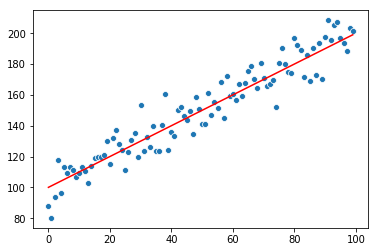

In [3]:
sns.scatterplot(x, y)
sns.lineplot(x, true_y, color = 'r')

In [4]:
# x = x.reshape(-1, 1)
new_x = np.stack((x.reshape(-1, 1), np.ones(shape=(x.shape[0], 1))), axis = 1).reshape(-1, 2)
new_y = y.reshape(-1, 1)

In [5]:
w = np.dot(np.dot(np.linalg.inv(np.dot(new_x.transpose(), new_x)), new_x.transpose()), new_y)
print(w)

[[ 1.02085163]
 [99.76123634]]


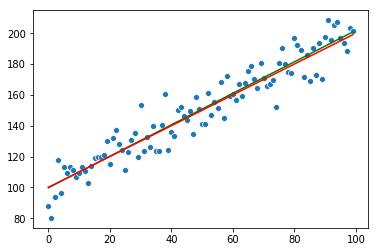

In [6]:
sns.scatterplot(x, y)
# sns.lineplot(x, y, color = 'r')
sns.lineplot(x, np.dot(new_x, w).flatten(), color = 'g')
sns.lineplot(x, true_y, color = 'r')

sometimes we cannot make sure that x is reverable

## Gradient descent

$$\frac{\partial l}{\partial \beta} = 2x^T \(x\beta - y\)\$$

update:

$$\beta_{i+1} = \beta_{i} - \alpha \times \frac{\partial l}{\partial \beta}$$

loss at 0th iteration is 368174023.1893738
loss at 10000th iteration is 93797.4834316717
loss at 20000th iteration is 39498.473208898075
loss at 30000th iteration is 19817.830838632148
loss at 40000th iteration is 12684.594293118373
loss at 50000th iteration is 10099.157158650853
loss at 60000th iteration is 9162.067082690035
loss at 70000th iteration is 8822.419369443645
stop at 76630th iteration
loss at end is: 8727.852737567717


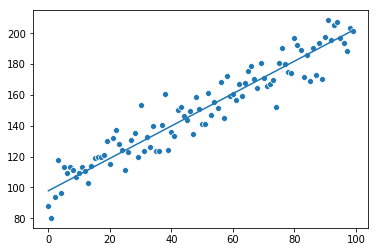

In [20]:
import matplotlib.pyplot as plt

plt.figure()
sns.scatterplot(x, y)

beta = np.array([100, 5]).reshape(-1, 1)
lamda = 0.0001

for i in range(100000):
    loss = (np.dot(new_x, beta) - new_y)
    gradient = 2 * np.dot(new_x.transpose(),  loss)
    old = beta
    beta = beta - lamda * gradient /new_x.shape[0]
    cost = np.sum(np.square(np.dot(new_x, beta) - new_y))
    if i % 10000 == 0:
        print('loss at {}th iteration is {}'.format(i, cost))
    change = np.sum(np.square(old - beta))
    if change < pow(10, -8):
        print('stop at %dth iteration'%i)
        print('loss at end is: {}'.format(cost))
        break
    
sns.lineplot(x, np.dot(new_x, beta).flatten())

## Newton
$$\frac{\partial l}{\partial \beta} = 2x^T \(x\beta - y\)\$$

$$\frac{\partial ^2 l}{\partial \beta \partial \beta} = 2x^T \(x\beta - y\)\$$

update:

$$\beta_{i+1} = \beta_{i} - \alpha \times \frac{f^{'}}{f^{''}}$$

loss at 0th iteration is 3062669118.6910377
stop at 1063th iteration
loss at end is: 8630.937536917261


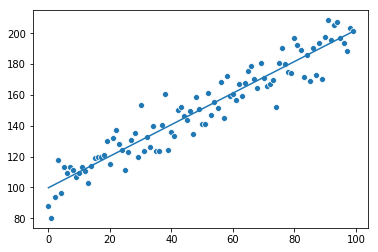

In [24]:
import matplotlib.pyplot as plt

plt.figure()
sns.scatterplot(x, y)

beta = np.array([100, 5]).reshape(-1, 1)
lamda = 0.01

for i in range(100000):
    loss = (np.dot(new_x, beta) - new_y)
    gradient = 2 * np.dot(new_x.transpose(),  loss)
    d_gradient = 2 * np.dot(new_x.transpose(), new_x)
    old = beta
    test = np.linalg.inv(np.dot(d_gradient.transpose(), d_gradient))
    beta = beta - lamda * np.dot(test, np.dot(d_gradient.transpose(), gradient))
    cost = np.sum(np.square(np.dot(new_x, beta) - new_y))
    if i % 10000 == 0:
        print('loss at {}th iteration is {}'.format(i, cost))
    change = np.sum(np.square(old - beta))
    if change < pow(10, -9):
        print('stop at %dth iteration'%i)
        print('loss at end is: {}'.format(cost))
        break
    
sns.lineplot(x, np.dot(new_x, beta).flatten())